# **Packages**


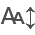

In [53]:
import pandas as pd
import numpy as np
from itables import init_notebook_mode, show, options
init_notebook_mode(all_interactive=True)
import matplotlib.pyplot as plt
import seaborn as sns

# **Chargement datasets**

In [54]:
# Chargement des données
clients = pd.read_csv('../data/clients 2.csv', sep=';')
commandes = pd.read_csv('../data/commandes 2.csv', sep=';')
prescriptions = pd.read_csv('../data/prescriptions 2.csv', sep=';')
montures = pd.read_csv('../data/produits_montures 2.csv', sep=';')
verres = pd.read_csv('../data/produits_verres 2.csv', sep=';')

# **Fusion des tables**

In [55]:
# Fusion commandes + clients
df = commandes.merge(clients, on='Client_ID', how='left')

# Fusion avec montures
df = df.merge(montures, on='Monture_ID', how='left')

# Afficher les premières lignes
df.head()

Commande_ID Client_ID  Verre_ID Monture_ID Date_Commande  Statut  \
0        COM1  CLI85894  VER66477   MON14150    2024-11-21  Livree   
1        COM2  CLI78693  VER33250   MON98676    2024-12-01  Livree   
2        COM3  CLI79578  VER57769   MON20808    2024-10-25  Livree   
3        COM4  CLI16507   VER8856   MON92263    2024-08-23  Livree   
4        COM5  CLI19635  VER79342   MON29264    2024-12-18  Livree   

   Montant_Total (€) Methode_Paiement  \
0             543.97               CB   
1             754.56               CB   
2             215.72               CB   
3             404.84               CB   
4             614.38               CB   

                            Adresse_Livraison    Canal  ...   Marque Modele  \
0   62, rue Isabelle Petitjean,34246 Chretien  Magasin  ...   Oakley  Fd463   
1     89, rue Traore,12843 Saint Alix-sur-Mer  Magasin  ...  Ray-Ban  iL468   
2  82, rue Mathilde Herve,60843 BertrandVille  Magasin  ...   Oakley  CL420   
3     45, rue Tristan Dupre,60751 BaillyBourg  Magasin  ...  Ray-Ban  ZB344   
4         chemin Claudine Leconte,25747 Boyer  Magasin  ...  Ray-Ban  NH836   

           Type     Forme   Materiau      Couleur     Taille Prix (€)  \
0       Cerclee     Ronde  Plastique  Transparent  55-17-134   279.98   
1  Semi-cerclee  Aviateur      Metal  Transparent  58-15-139   428.57   
2       Cerclee     Ronde     Titane      Ecaille  51-15-136    76.73   
3       Cerclee  Aviateur  Plastique         Noir  58-18-141   105.85   
4       Cerclee  Aviateur  Plastique         Noir  59-14-147   369.39   

      Style Stock  
0     Sport    38  
1  Business    50  
2     Sport    12  
3      Luxe    26  
4    Casual    23  

[5 rows x 34 columns]

In [56]:
df.shape

(100000, 34)

# **Nettoyage des données**

In [57]:
df_clean = df.copy()

# --- 1. SUPPRIMER les colonnes inutiles (adresse, email, téléphone, etc.)
colonnes_a_supprimer = [
    'Adresse', 'Email', 'Telephone', 'Adresse_Livraison', 'Nom', 'Prenom', 'Statut', 'Montant_Total (€)', 'Methode_Paiement',
    'Ville', 'Code_Postal', 'Pays', 'Commande_ID', 'Date_Commande', 'Client_ID', 'Verre_ID', 
    'Prix (€)', 'Frequence_Achat', 'Stock', 'Canal' , 'Mode_Paiement_Favori', 'Preferences_Communication',
    'Modele', "Retours"
]
df_clean.drop(columns=[col for col in colonnes_a_supprimer if col in df_clean.columns], inplace=True)
df_clean.set_index('Monture_ID', inplace=True)
df_clean.columns

Index(['Date_Naissance', 'Genre', 'Marque', 'Type', 'Forme', 'Materiau',
       'Couleur', 'Taille', 'Style'],
      dtype='object')

In [58]:
# Convertir la date de naissance en âge
df_clean['Date_Naissance'] = pd.to_datetime(df_clean['Date_Naissance'], errors='coerce')
df_clean['Age'] = pd.Timestamp.now().year - df_clean['Date_Naissance'].dt.year
df_clean.drop(columns=['Date_Naissance'], inplace=True)
df_clean.head()

Genre   Marque          Type     Forme   Materiau  \
Monture_ID                                                            
MON14150          Homme   Oakley       Cerclee     Ronde  Plastique   
MON98676    Non-binaire  Ray-Ban  Semi-cerclee  Aviateur      Metal   
MON20808    Non-binaire   Oakley       Cerclee     Ronde     Titane   
MON92263          Homme  Ray-Ban       Cerclee  Aviateur  Plastique   
MON29264          Femme  Ray-Ban       Cerclee  Aviateur  Plastique   

                Couleur     Taille     Style  Age  
Monture_ID                                         
MON14150    Transparent  55-17-134     Sport   39  
MON98676    Transparent  58-15-139  Business   27  
MON20808        Ecaille  51-15-136     Sport   74  
MON92263           Noir  58-18-141      Luxe   36  
MON29264           Noir  59-14-147    Casual   20

In [59]:
# Verifier les valeurs manquantes
df_clean.isna().sum()

Genre       0
Marque      0
Type        0
Forme       0
Materiau    0
Couleur     0
Taille      0
Style       0
Age         0
dtype: int64

In [60]:
df_clean.duplicated().sum()  # Supprimer les lignes avec des valeurs manquantes

np.int64(346)

In [61]:
df_clean.drop_duplicates(inplace=True)

# **Statistiques descriptives**

In [24]:
# Statistiques descriptives
print("\nStatistiques descriptives :")
display(df_clean.describe())


Statistiques descriptives :


Age
count  100000.000000
mean       50.073290
std        18.206152
min        18.000000
25%        34.000000
50%        50.000000
75%        66.000000
max        81.000000

# **Exploration des données**


Distribution des colonnes numériques :


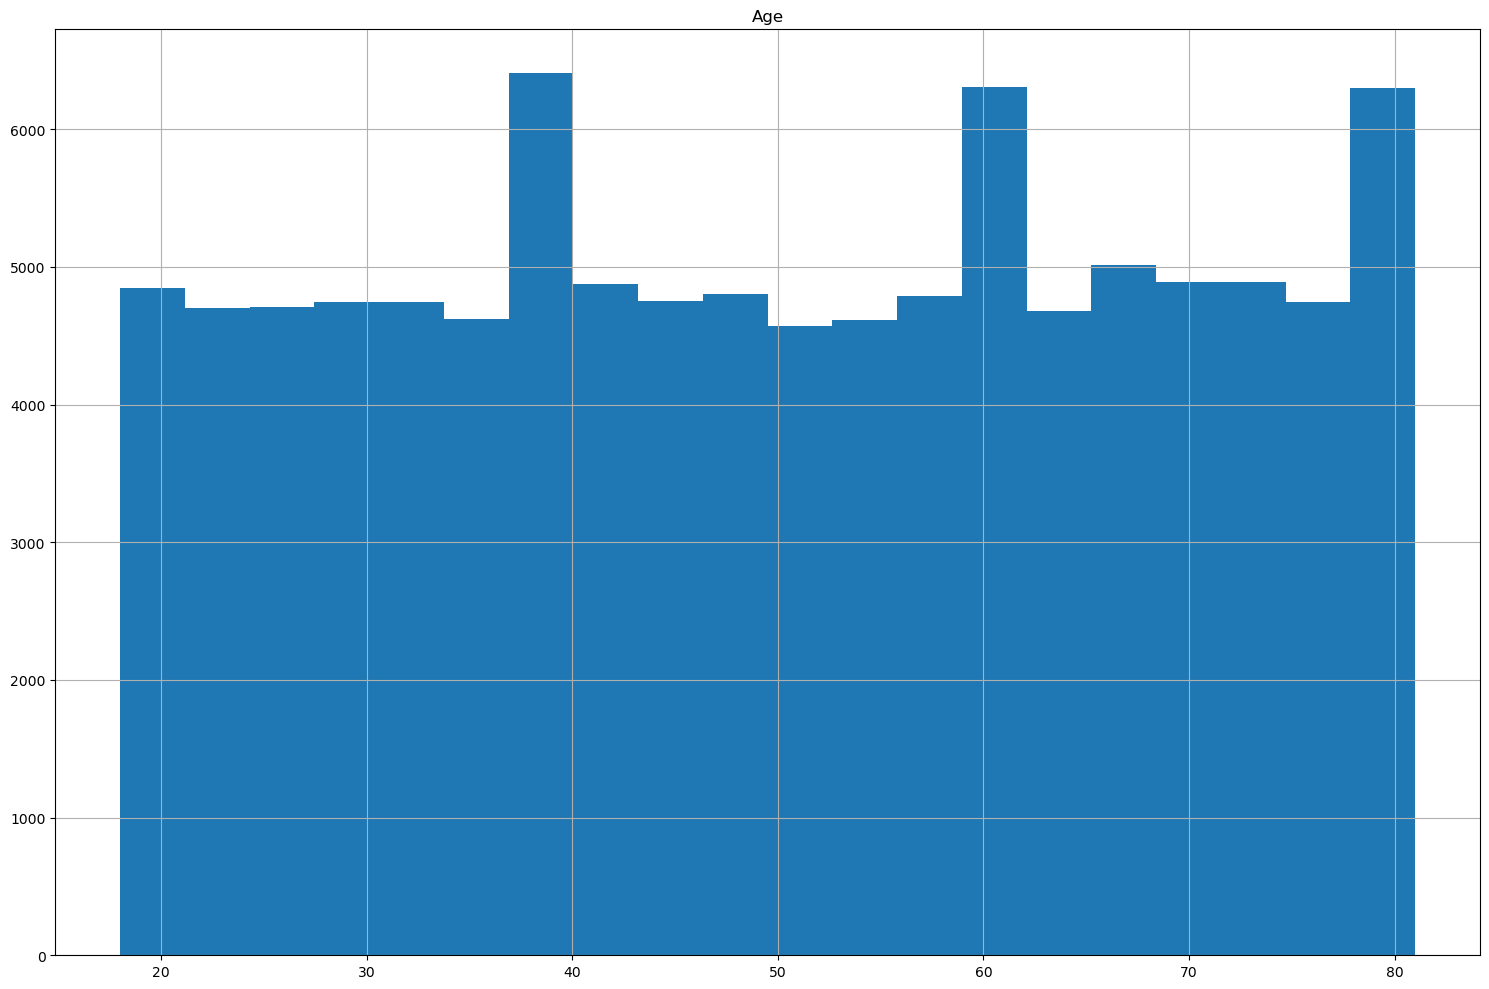

In [25]:
# Distribution des colonnes numériques
print("\nDistribution des colonnes numériques :")
df_clean.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

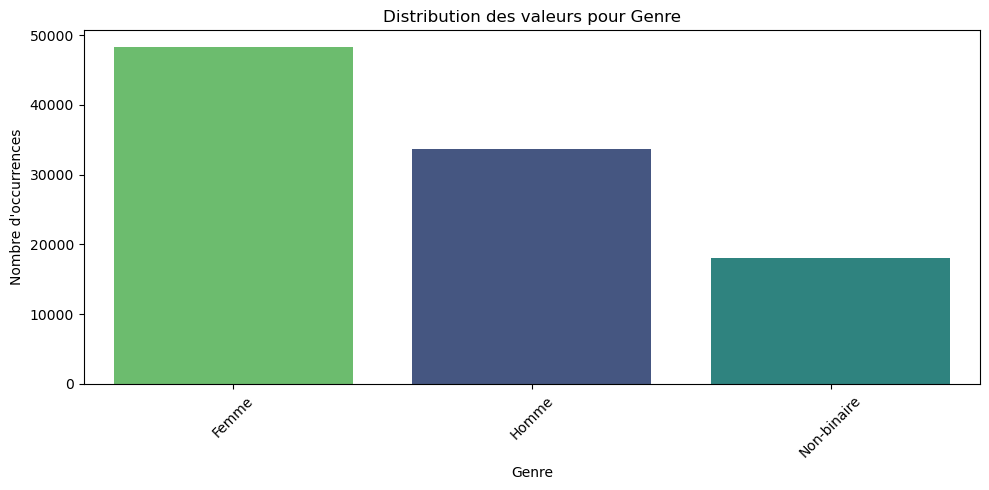

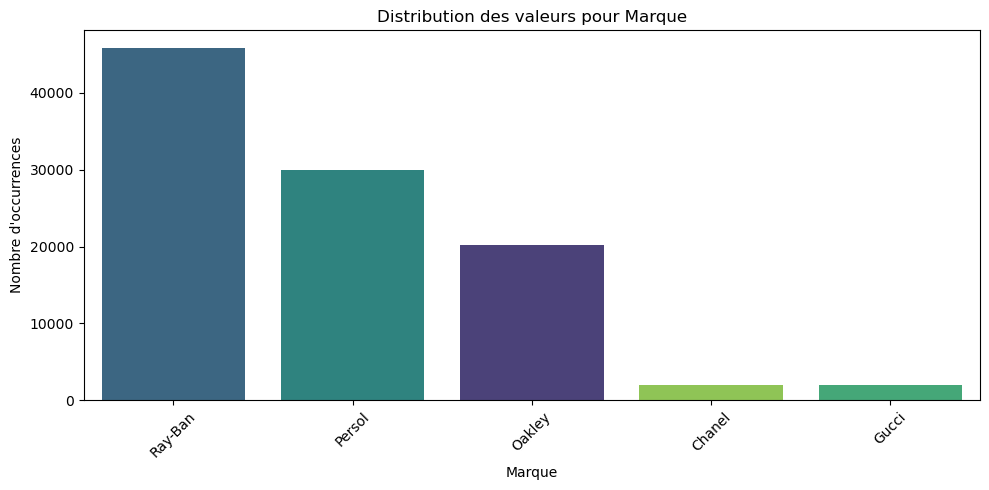

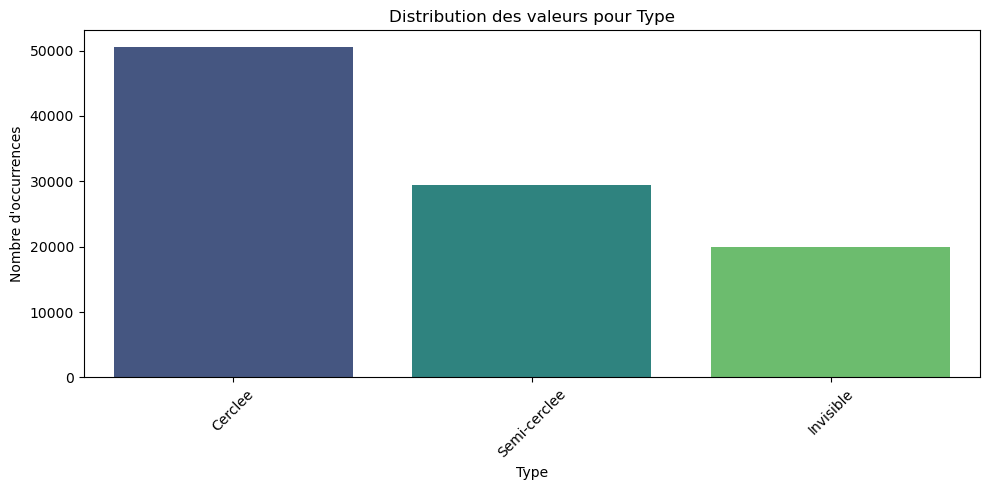

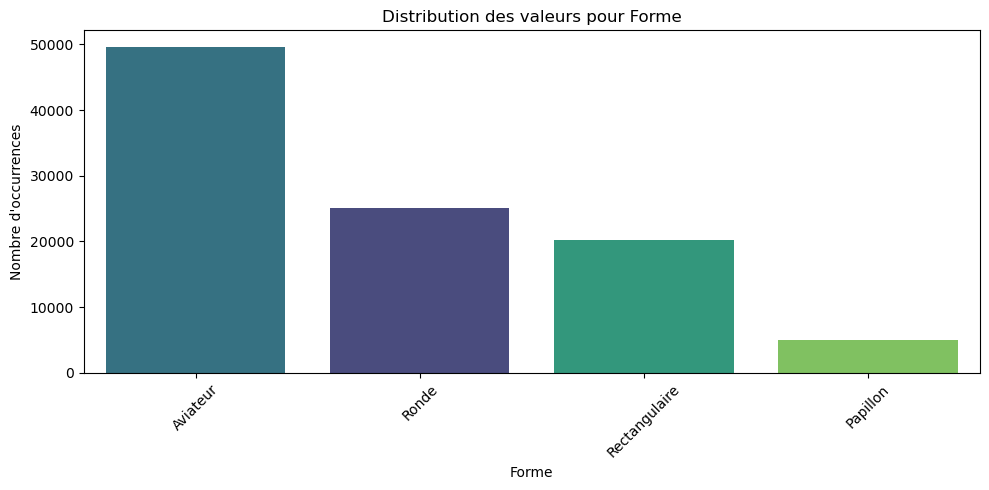

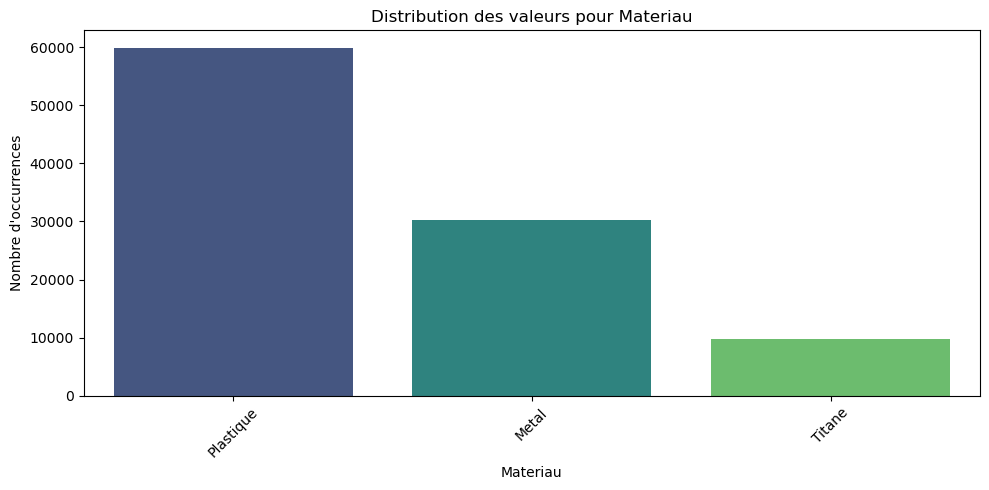

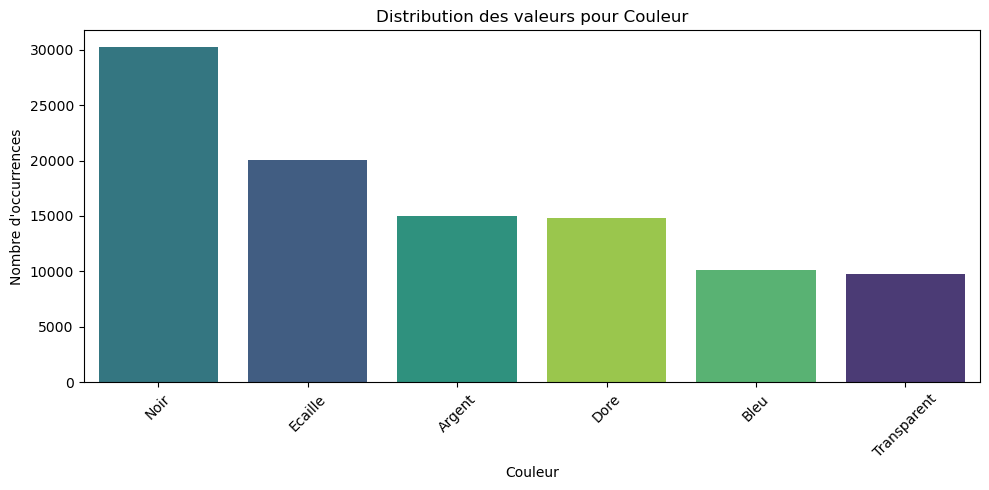

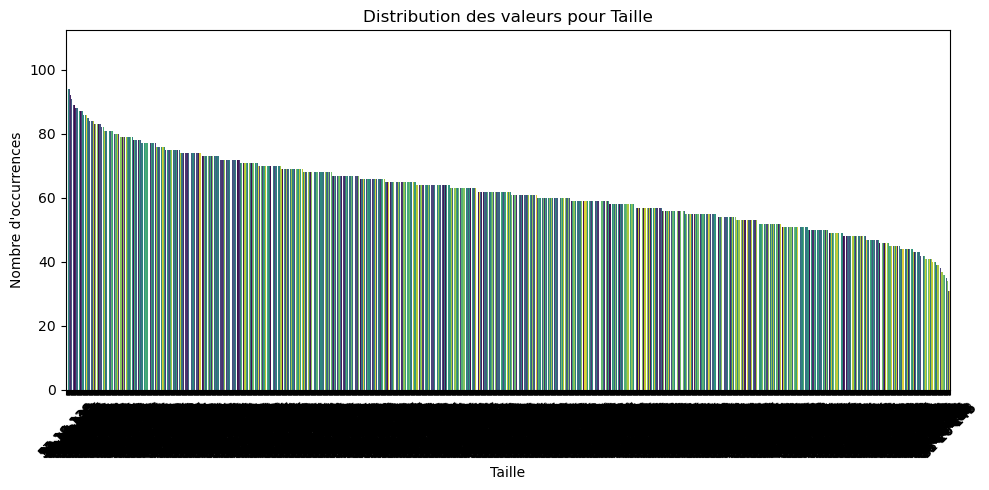

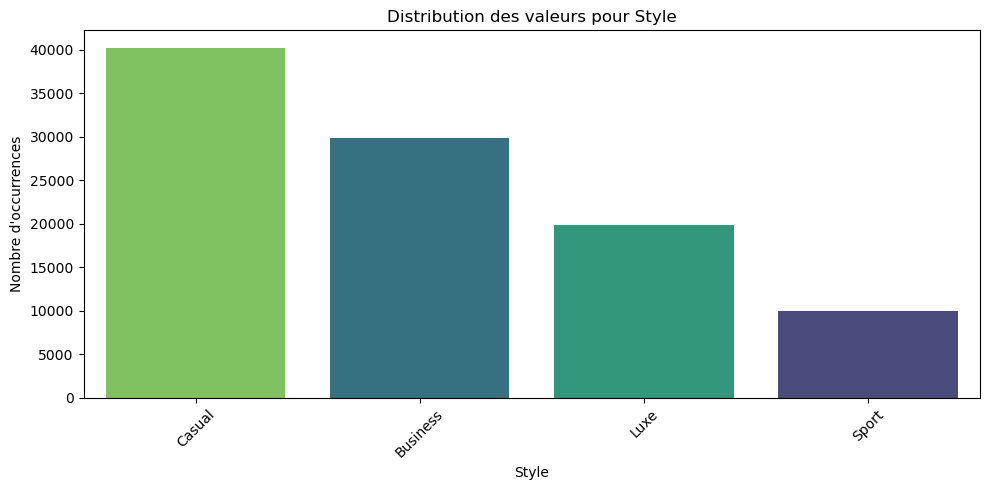

In [10]:
categorical_columns = df_clean.select_dtypes(include=['object']).columns

for col in categorical_columns:    
    # Création d'un diagramme à barres
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_clean, x=col, hue= col, order=df_clean[col].value_counts().index, palette="viridis")
    plt.title(f"Distribution des valeurs pour {col}")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Nombre d'occurrences")
    plt.tight_layout()
    plt.show()

In [ ]:
# Exporter le DataFrame nettoyé
df_clean.to_csv('../data/df_clean.csv', sep=';')

# **Génération échantillon**

In [ ]:
# # On suppose que df est le dataframe nettoyé contenant les colonnes nécessaires
# # et qu’il contient aussi Client_ID et Monture_ID issus de la fusion précédente.

# # --- 1. ÉCHANTILLONS POSITIFS ---
# positifs = df.copy()
# positifs['achat'] = 1  # Label
# positifs = positifs[['Client_ID', 'Monture_ID', 'achat', 'Date_Naissance', 'Genre', 'Marque', 'Type', 'Forme', 'Materiau', 'Couleur', 'Taille', 'Style']]
# positifs['Date_Naissance'] = pd.to_datetime(positifs['Date_Naissance'], errors='coerce')
# positifs['Age'] = pd.Timestamp.now().year - positifs['Date_Naissance'].dt.year
# positifs.drop(columns=['Date_Naissance'], inplace=True)
# # --- 2. ÉCHANTILLONS NÉGATIFS ---

# # Toutes les montures possibles
# montures_possibles = montures['Monture_ID'].unique()

# # Ne garder que les colonnes utiles
# clients_reduit = clients[['Client_ID', 'Date_Naissance', 'Genre']]
# montures_reduit = montures[['Monture_ID', 'Marque', 'Type', 'Forme', 'Materiau', 'Couleur', 'Taille', 'Style']]


# # Pour chaque client, générer N montures aléatoires qu’il n’a pas achetées
# negatifs = []

# for client_id, montures_achetees in df.groupby('Client_ID')['Monture_ID']:
#     montures_non_achetees = np.setdiff1d(montures_possibles, montures_achetees)
    
#     # On choisit k montures non achetées aléatoirement (ex: 3 pour 1)
#     k = min(3 * len(montures_achetees), len(montures_non_achetees))
#     montures_negatives = np.random.choice(montures_non_achetees, size=k, replace=False)

#     for m in montures_negatives:
#         negatifs.append({'Client_ID': client_id, 'Monture_ID': m, 'achat': 0})

# negatifs_df = pd.DataFrame(negatifs)

# # On fusionne les caractéristiques clients + montures avec les négatifs
# negatifs_df = negatifs_df.merge(clients_reduit, on='Client_ID', how='left')
# negatifs_df = negatifs_df.merge(montures_reduit, on='Monture_ID', how='left')

# # Nettoyage des colonnes comme pour les positifs
# negatifs_df['Date_Naissance'] = pd.to_datetime(negatifs_df['Date_Naissance'], errors='coerce')
# negatifs_df['Age'] = pd.Timestamp.now().year - negatifs_df['Date_Naissance'].dt.year
# negatifs_df.drop(columns=['Date_Naissance'], inplace=True)


# # --- 3. COMBINAISON ---
# df_final = pd.concat([positifs, negatifs_df], ignore_index=True)

# df_final.to_csv('../data/df_final.csv', sep=';', index=False)

# # Vérification finale
# print(df_final['achat'].value_counts())
# print("Shape finale :", df_final.shape)


achat
0    300000
1    100000
Name: count, dtype: int64
Shape finale : (400000, 12)


In [ ]:
# df_clean.columns

Index(['Genre', 'Marque', 'Type', 'Forme', 'Materiau', 'Couleur', 'Taille',
       'Style', 'Age'],
      dtype='object')

In [ ]:
# df_final = pd.read_csv('../data/df_final.csv', sep=';')
# df_final.columns

Index(['Client_ID', 'Monture_ID', 'achat', 'Genre', 'Marque', 'Type', 'Forme',
       'Materiau', 'Couleur', 'Taille', 'Style', 'Age'],
      dtype='object')

In [ ]:
# df_final.isna().sum()

Client_ID     0
Monture_ID    0
achat         0
Genre         0
Marque        0
Type          0
Forme         0
Materiau      0
Couleur       0
Taille        0
Style         0
Age           0
dtype: int64